In [ ]:
pwd

'/home/wsuser/work'

In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPool2D,Flatten
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import glob
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
#Rescaling , Zooming ,Horizontal Flip Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range = 0.2,horizontal_flip = True,vertical_flip = False)
test_datagen = ImageDataGenerator(rescale = 1./255)

**Data Collection & Pre Processing**

In [ ]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

#hidden code - removed

bucket = 'fertilizerrecommendationsystemfor-donotdelete-pr-iyeg18ve25havp'
object_key = 'Veg-dataset.zip'

streaming_body_4 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [ ]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_4.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [ ]:
import os
filenames =os.listdir('/home/wsuser/work/Veg-dataset/train_set/')

In [ ]:
train_dir = "/home/wsuser/work/Veg-dataset/train_set/"
test_dir = "/home/wsuser/work/Veg-dataset/test_set"

In [ ]:
# function to get count of images
def get_files(directory):
    if not os.path.exists(directory):
        return 0
    count=0
    for current_path,dirs,files in os.walk(directory):
        for dr in dirs:
            count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
    return count

In [ ]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

9 Classes
11386 Train images
3416 Test images


In [ ]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                target_size=(img_width,img_height),batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(img_width,img_height),batch_size=batch_size)

Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [ ]:
# The name of the 12 diseases.
train_generator.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

**Training the Model**

In [ ]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

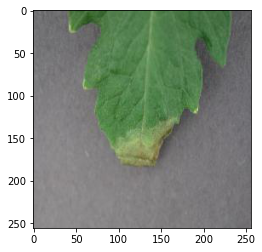

In [ ]:
from keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
img1 = load_img('/home/wsuser/work/Veg-dataset/train_set/Tomato___Late_blight/013f987a-9371-4763-a104-ea6f326e584b___GHLB2 Leaf 8556.JPG')
plt.imshow(img1);
#preprocess image
img1 = load_img('/home/wsuser/work/Veg-dataset/train_set/Tomato___Late_blight/013f987a-9371-4763-a104-ea6f326e584b___GHLB2 Leaf 8556.JPG', target_size=(256, 256))
img = img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
validation_generator = train_datagen.flow_from_directory(
                       train_dir, # same directory as training data
                       target_size=(img_height, img_width),
                       batch_size=batch_size)
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
nb_epoch = 15
train=model.fit_generator(train_generator,epochs=nb_epoch,steps_per_epoch=train_generator.samples//batch_size,validation_data=validation_generator,validation_steps=validation_generator.samples // batch_size,verbose=1)


Found 11386 images belonging to 9 classes.


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/tmp/wsuser/ipykernel_164/2339187767.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train=model.fit_generator(train_generator,epochs=nb_epoch,steps_per_epoch=train_generator.samples//batch_size,validation_data=validation_generator,validation_steps=validation_generator.samples // batch_size,verbose=1)


Epoch 1/15
355/355 [==============================] - 827s 2s/step - loss: 1.1056 - accuracy: 0.6067 - val_loss: 0.6786 - val_accuracy: 0.7526
Epoch 2/15
355/355 [==============================] - 831s 2s/step - loss: 0.5690 - accuracy: 0.7962 - val_loss: 0.3576 - val_accuracy: 0.8799
Epoch 3/15
355/355 [==============================] - 816s 2s/step - loss: 0.3926 - accuracy: 0.8592 - val_loss: 0.2456 - val_accuracy: 0.9158
Epoch 4/15
355/355 [==============================] - 826s 2s/step - loss: 0.2871 - accuracy: 0.9010 - val_loss: 0.1648 - val_accuracy: 0.9422
Epoch 5/15
355/355 [==============================] - 819s 2s/step - loss: 0.2508 - accuracy: 0.9096 - val_loss: 0.1616 - val_accuracy: 0.9449
Epoch 6/15
355/355 [==============================] - 822s 2s/step - loss: 0.2112 - accuracy: 0.9261 - val_loss: 0.1219 - val_accuracy: 0.9561
Epoch 7/15
355/355 [==============================] - 823s 2s/step - loss: 0.1871 - accuracy: 0.9331 - val_loss: 0.1383 - val_accuracy: 0.9522

In [ ]:
# Save model
from keras.models import load_model
model.save('vegetable.h5')